# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

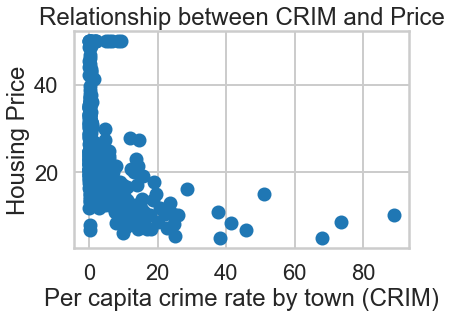

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [13]:
# your turn

#### Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?

We see a non-linear negative relationship between the two variables, kind of exponential. The inverted 'L' on the upper left corner seems strange, or rather the big gap on the price where the 'CRIM' is between around 1 and 10. There must be some attraction for burglary on the best or more expensive buildings, but it could be for other reason or for errors on the data. Some data points seem outliers in the sense that they have a relative high price for a town where the crime rate per capita is high. 

#### Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

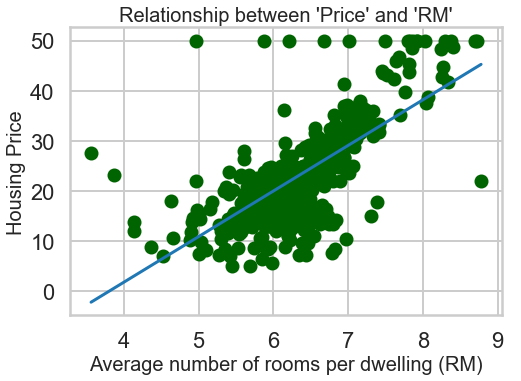

In [14]:
# scatter plot between *RM* and *PRICE*

plt.scatter(bos.RM, bos.PRICE, color='darkgreen')
plt.title("Relationship between 'Price' and 'RM'", fontsize=20)
plt.xlabel("Average number of rooms per dwelling (RM)", fontsize=20)
plt.ylabel("Housing Price", fontsize=20)

# plotting a theoretical linear regression manually
a, b = np.polyfit(bos.RM, bos.PRICE, 1)
x = np.array([min(bos.RM), max(bos.RM)])
y = a * x + b
plt.plot(x, y)

# plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

There is a clear positive relationship between these two variables, and a linear regression model should fit well here, given the relative short distance between the data and the line. It also makes sense this relationship, since the housing price should go up as the number of rooms per dwelling increases, and also, intuitively, in a more or less linear fashion. There seems to be, however, some outliers on the upper side of the plot.

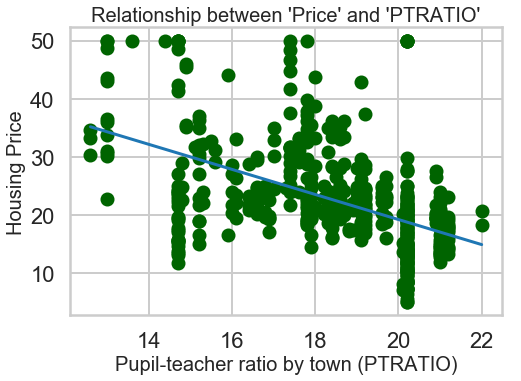

In [15]:
# scatter plot between *PTRATIO* and *PRICE*

plt.scatter(bos.PTRATIO, bos.PRICE, color='darkgreen')
plt.title("Relationship between 'Price' and 'PTRATIO'", fontsize=20)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)", fontsize=20)
plt.ylabel("Housing Price", fontsize=20)

# plotting a linear regression fit
a, b = np.polyfit(bos.PTRATIO, bos.PRICE, 1)
x = np.array([min(bos.PTRATIO), max(bos.PTRATIO)])
y = a * x + b
plt.plot(x, y)

# plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In this case, there is a negative correlation, as seen in the plot. Although there are higher squared errors present when fitting a regression line, this could still be a good predictor.

It is generally assumed that a low pupil-teacher ratio signifies smaller classes, which enables the teacher to pay more attention to individual students, which may in the long run result in a better performance of the pupils. However, this variable has some limitations since it does not take into account several factors, like the distribution/variations of the pupils in classes, differences in teachers pedagogical training, teaching methods, etc. This way, it has a tendency to have a somewhat confusing interpretation or validity, so just a note that I don't know how long or strong the relationship with price would endure. In any case, for now it has.

#### Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see

There are some interesting relationships between some variables, like for example between 'LSTAT' and 'RM', but I will stick to the relationships with the target of interest, 'PRICE'.

In [16]:
# correlations
bos.corr(method='pearson')['PRICE'].sort_values(ascending=False)


PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

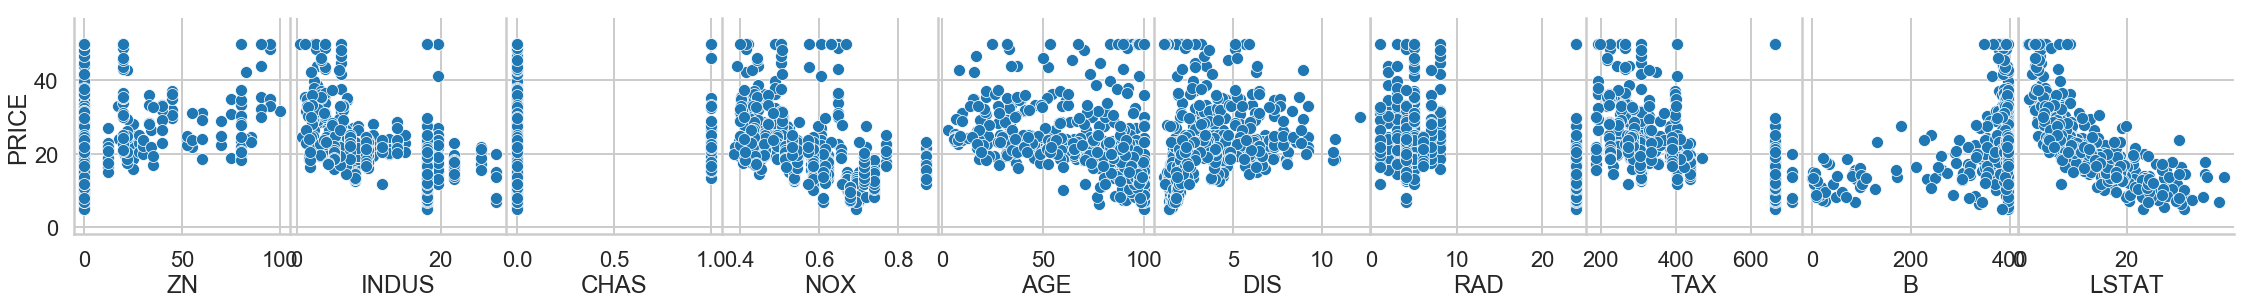

In [17]:
# pairplot - all remaining scatter plots
sns.pairplot(bos, x_vars=bos.drop(["PRICE", "CRIM", "RM", "PTRATIO"], axis=1).columns, y_vars="PRICE")
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

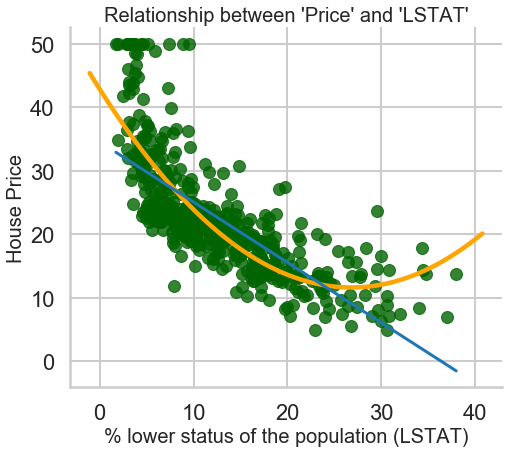

In [18]:
# scatter plot between *LSTAT* and *PRICE*

sns.lmplot(x="LSTAT", y="PRICE", data=bos, order=2, line_kws={'color': 'orange'}, 
           scatter_kws={'color': 'darkgreen'}, ci=None)
plt.title("Relationship between 'Price' and 'LSTAT'", fontsize=20)
plt.xlabel("% lower status of the population (LSTAT)", fontsize=20)
plt.ylabel("House Price", fontsize=20)

# plotting a linear regression fit
a, b = np.polyfit(bos.LSTAT, bos.PRICE, 1)
x = np.array([min(bos.LSTAT), max(bos.LSTAT)])
y = a * x + b
plt.plot(x, y)

# plot
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

The 'LSTAT' variable is the percentage of the population of the town that is of 'lower status', which is defined as being an adult with less than a ninth-grade education or a male worker that is classified as a laborer. 

The relationship between 'LSTAT' and price seems to be the most obvious and significant, in the sense that where the percentage of the lower status of the population is high, the house price is lower. This relationship seems to be best represented when increasing the flexibility of the regression, as shown in the plot above. This variable should be one of the best predictors, since it is intuitive that people with usually less economic means are living in towns where the housing price is lower.

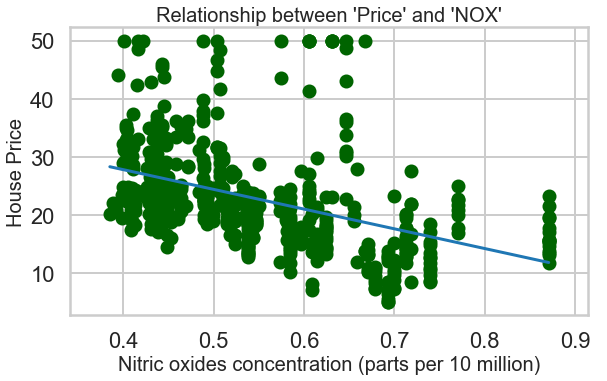

In [19]:
# scatter plot between *NOX* and *PRICE*

plt.scatter(bos.NOX, bos.PRICE, color='darkgreen')
plt.title("Relationship between 'Price' and 'NOX'", fontsize=20)
plt.xlabel("Nitric oxides concentration (parts per 10 million)", fontsize=20)
plt.ylabel("House Price", fontsize=20)

# plotting a linear regression fit
a, b = np.polyfit(bos.NOX, bos.PRICE, 1)
x = np.array([min(bos.NOX), max(bos.NOX)])
y = a * x + b
plt.plot(x, y)

# plot
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

Nitric oxide is an air pollutant which at very high levels could be considered "immediately dangerous to life or health" (IDLH) by the US National Institute for Occupational Safety and Health (NIOSH), hence the negative correlation between these two variables. I would expect a stronger correlation, but the upper middle values of the plot could be outliers in this case, and if so, the variable could be an even better predictor of the housing price.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

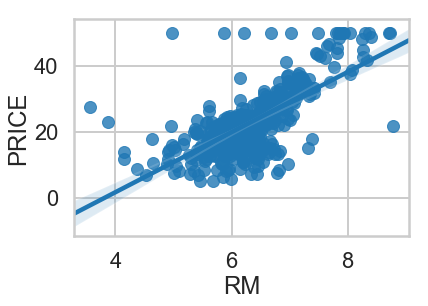

In [78]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.show()

### Histograms
***


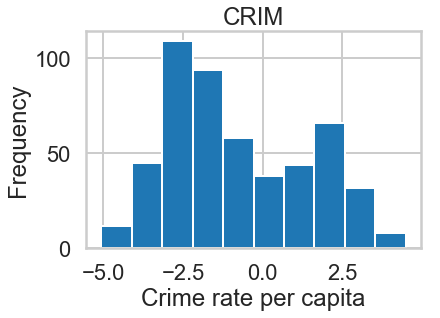

In [21]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

In [22]:
#your turn

#### Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

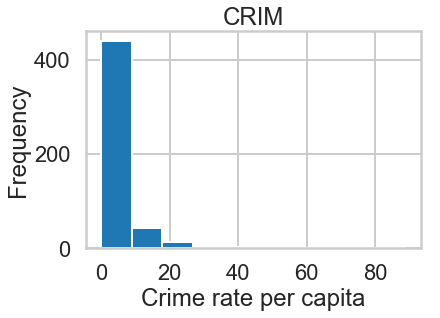

In [23]:
# histogram for *CRIM* without taking the log

plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

If we plot the histogram without the log transformation, it is difficult to interpret it since most of the data is accumulated to the left. Increasing the number of bins is not helpful too. The log transformation makes the relationship clearer, it makes highly skewed distributions, such as in this case, less skewed, making it more symmetric. With the transformation, we can see a bimodal distribution that otherwise we would not.

#### Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

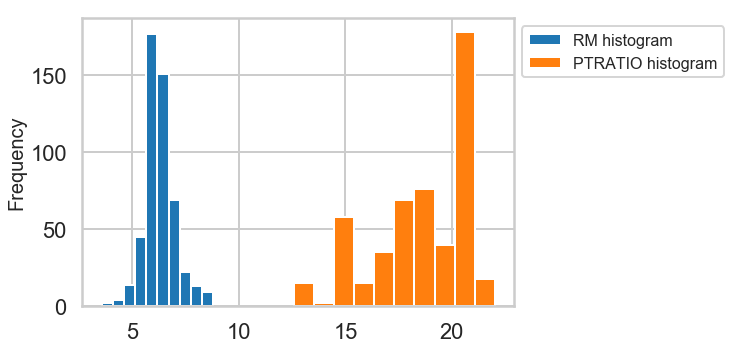

In [24]:
plt.hist(bos.RM)
plt.hist(bos.PTRATIO)

plt.ylabel("Frequency", fontsize=20)
plt.legend(['RM histogram', 'PTRATIO histogram'], bbox_to_anchor=(1, 1), fontsize=16)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

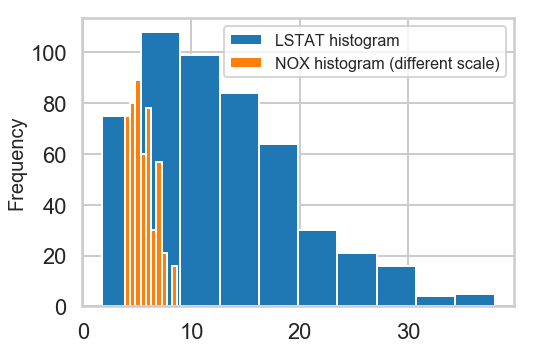

In [25]:
plt.hist(bos.LSTAT)
plt.hist(bos.NOX*10)

plt.ylabel("Frequency", fontsize=20)
plt.legend(['LSTAT histogram', 'NOX histogram (different scale)'], fontsize=16, bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Since we are looking for correlations I will look at the scatter plots of the predictors against each other:

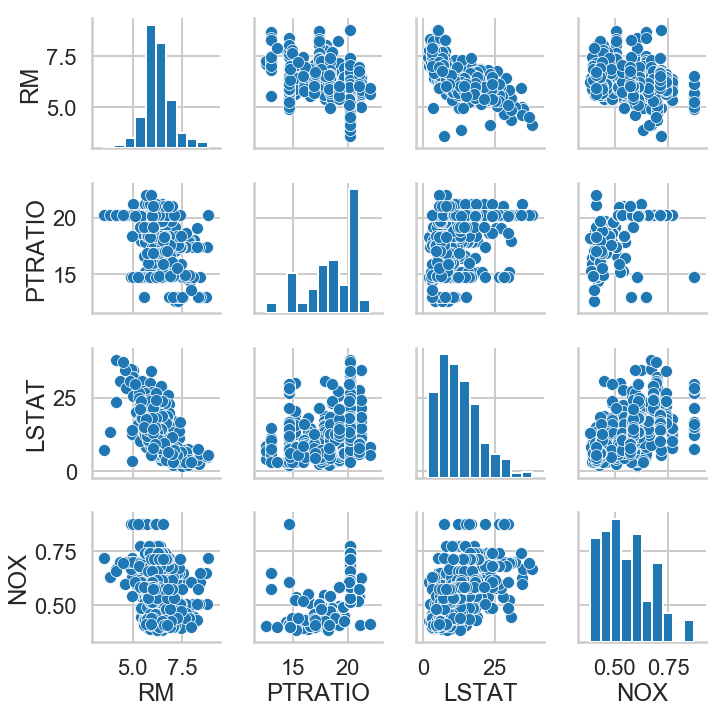

In [26]:
# pairplot with the 4 predictors
sns.pairplot(bos[['RM', 'PTRATIO', 'LSTAT', 'NOX']])
plt.show()

Clustermap:

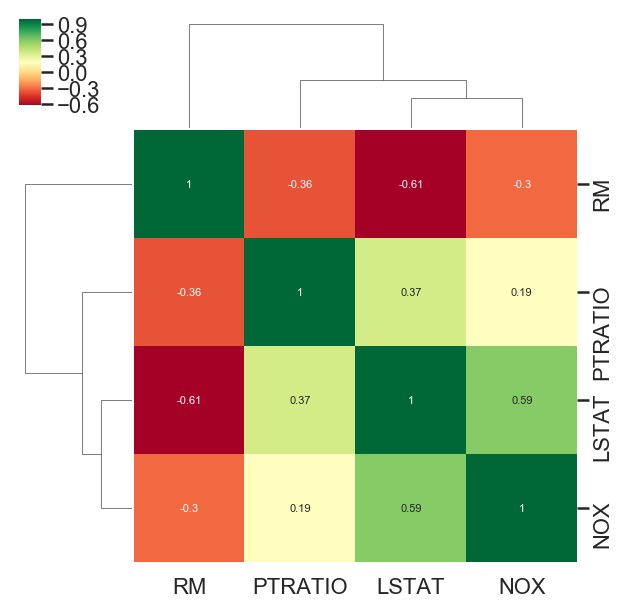

In [27]:
# clustermap
sns.clustermap(bos[['RM', 'PTRATIO', 'LSTAT', 'NOX']].corr(method='pearson'), cmap='RdYlGn', annot=True, annot_kws={"size": 11})
plt.show()

'LSTAT' and 'RM' have the most noticeable correlation. This collinearity does not reduce the predictive power of the model as a whole, but it affects the calculations regarding individual predictors and therefore the interpretability of the model.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        20:07:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [30]:
# your turn

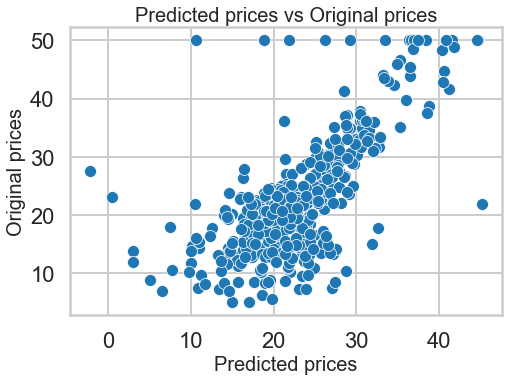

In [31]:
# scatterplot
sns.scatterplot(m.fittedvalues, bos['PRICE'])
plt.title("Predicted prices vs Original prices", fontsize=20)
plt.xlabel("Predicted prices", fontsize=20)
plt.ylabel("Original prices", fontsize=20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

There is a positive linear relationship, which is good, but the accuracy is worst at the extremes, especially around prices at 50. This could suggest the presence of outliers or other type of errors on those observations of the predictor variable.

In this case, with only one predictor, plotting the predicted prices against the original prices has a similar configuration as plotting the variable/predictor 'RM' against the original prices, since it is just a linear transformation. If we plot one against the other it shows a straight line.

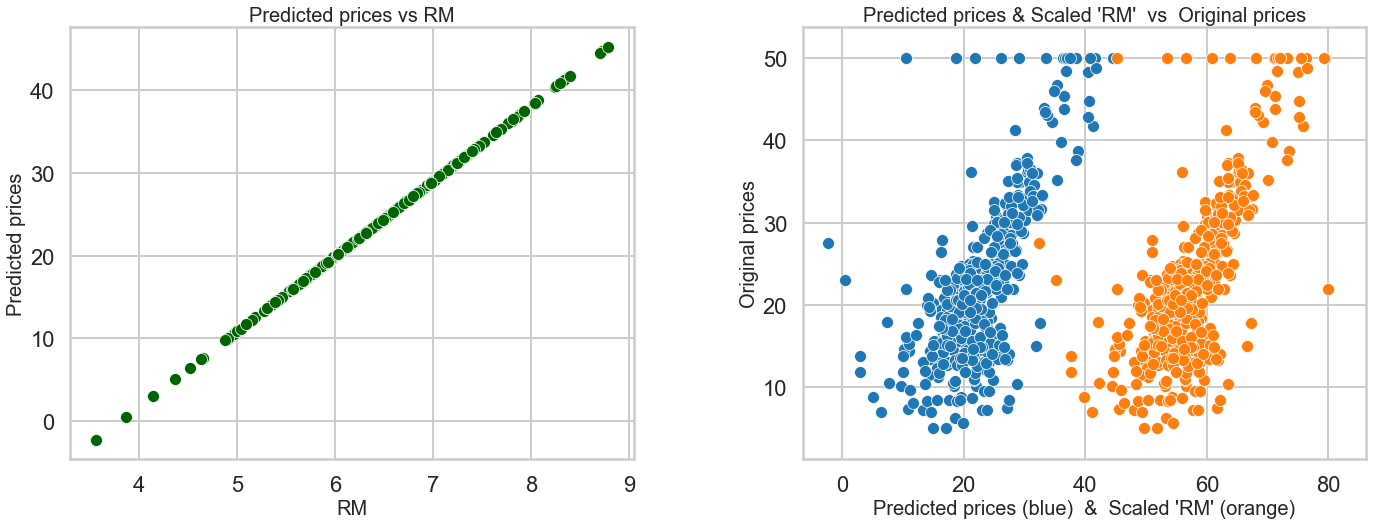

In [32]:
# 'RM' vs Predicted prices
plt.subplot(1, 2, 1)
sns.scatterplot(bos.RM, m.fittedvalues, color='darkgreen')
plt.title("Predicted prices vs RM", fontsize=20)
plt.ylabel("Predicted prices", fontsize=20)
plt.xlabel("RM", fontsize=20)

# scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(m.fittedvalues, bos['PRICE'])
sns.scatterplot(bos.RM*9.1021, bos['PRICE'])
plt.title("Predicted prices & Scaled 'RM'  vs  Original prices", fontsize=20)
plt.xlabel("Predicted prices (blue)  &  Scaled 'RM' (orange)", fontsize=20)
plt.ylabel("Original prices", fontsize=20)

# show
plt.subplots_adjust(left=-1, bottom=-0.5, right=2, top=1, wspace=0.3, hspace=0)
plt.show()

### Fitting Linear Regression using `sklearn`


In [33]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [34]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [35]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [36]:
# your turn

#### Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).

In [37]:
# How to change the model to exclude the intercept term:
lm_without_intercept = LinearRegression(fit_intercept=False)

The intercept term should not be removed, regardless of whether it makes sense or not to see all the variables equal to 0 (in this case, an average number of rooms per dwelling equal to 0 don't, but for others it does, like the dummy variable) or even if the intercept term is not significantly different than 0 (in this case, it is). This is because by forcing the intercept term to be 0 then all the other estimates become biased and the model never fits as well as with the intercept term.

In [38]:
# coefficients for the variables with intercept term:
print("coefficients for the variables with intercept term:", lm.coef_)

# coefficients for the variables without intercept term:
lm_without_intercept = LinearRegression(fit_intercept=False)
lm_without_intercept.fit(X, bos.PRICE)

print("\ncoefficients for the variables without intercept term:", lm_without_intercept.coef_)


coefficients for the variables with intercept term: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

coefficients for the variables without intercept term: [-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


Removing the intercept term changes the estimates of the relationships between the variables and the target and complicates the model, making it less accurate. This is better shown graphically. Also, leaving the intercept term assures that the mean of the residuals equals 0, which is a requirement for OLS.

At least these 2 sources provide good explanations:
* https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept
* https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model

#### Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

It is not enough, they must also be i.i.d. 

They should all have the same variance (identically distributed), because if it is not constant, that is, the size of the error differs across the values of the independent variables/predictors, then, since in OLS regression we are trying to minimize the residuals and we give the same weight to all observations, cases with larger disturbances would have more "pull" than others. They should also be independent of each other, because if not, the estimated errors will underestimate the true errors.

##### Exercise: True or false. To use linear regression,  𝑌  must be normally distributed. Explain your answer.

False, the linear model/regression only describes the expected value of Y depending on the values of the predictors, making no assumptions about any particular distribution for Y or for the other variables. OLS implicitly assumes normality for the residuals only.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [39]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509009


In [40]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [41]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [42]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [43]:
# your turn

#### Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

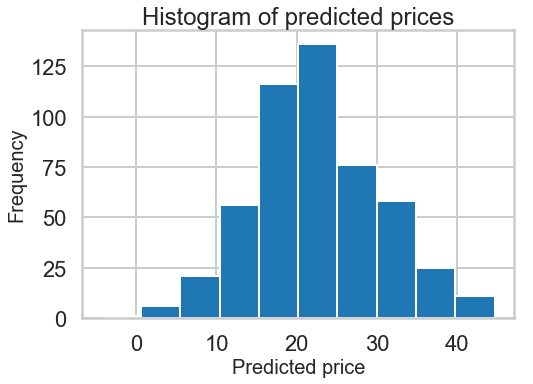

In [44]:
# histogram of all the predicted prices
plt.hist(lm.predict(X))
plt.title("Histogram of predicted prices")
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Predicted price", fontsize=20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [45]:
print(np.median(lm.predict(X)))
print(np.std(lm.predict(X)))

22.118652549968544
7.907257740483497


The distribution of the predicted prices seems to be normal but a little bit skewed to the left, centered at around 22 and with a standard deviation of approximately 8. Looking at the histogram only, there appear to be negative values as outliers. A reason for them to appear might relate with some incorrect recording of an observation during data collection. It's only one negative value and not too far away. Removing this observation probably wouldn't have a big impact on the least squares line or the r squared, so I would do nothing, for now.

In [46]:
lm.predict(X)[lm.predict(X)<0]

array([-4.28131071])

#### Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

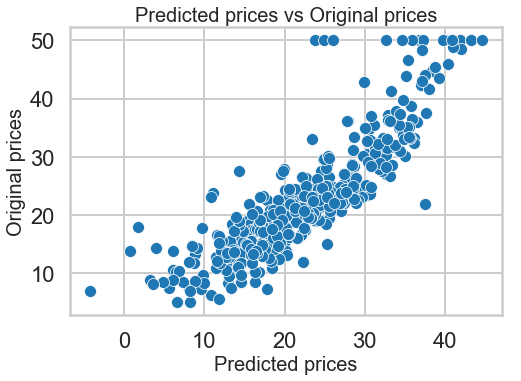

In [47]:
# scatterplot
sns.scatterplot(lm.predict(X), bos['PRICE'])
plt.title("Predicted prices vs Original prices", fontsize=20)
plt.xlabel("Predicted prices", fontsize=20)
plt.ylabel("Original prices", fontsize=20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

The graph seems symmetrically distributed along a 45-degree line, so the linearity assumption holds. Here it is easier to check for outliers, which are present on the upper side of the plot, at (original)prices equal to 50.

#### Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

statsmodel shows a lot of information in simple commands like summary, and has a R-like syntax which is good for people that are more used to that. It is good for statistical models like this since it returns more attributes in a clear way. scikit-learn seems to have a straightforward way of getting results and organizing the data and it also seems to be more used in general.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [48]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [49]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064707


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [50]:
# your turn

#### Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

In [51]:
# fitting a linear regression model using only the 'PTRATIO' and interpret the intercept and the coefficients.
y = bos['PRICE'].values.reshape(-1, 1)
X = bos['PTRATIO'].values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

print("Coefficients:", reg.coef_)
print("Intercept term:", reg.intercept_)

Coefficients: [[-2.1571753]]
Intercept term: [62.34462747]


The intercept term means the predicted housing price when the pupil-teacher ratio by town (PTRATIO) is 0 - meaning when there are no pupils, or no school. The coefficient means that when the PTRATIO increases by one unit, the housing price decreases sensibly 2.2 dollars.

#### Exercise: Calculate (or extract) the  𝑅2  value. What does it tell you?

In [52]:
# 𝑅2  value
r_2 = reg.score(X, y)
print("𝑅2:", r_2)

𝑅2: 0.257847318009223


The percentage of the variance in the housing price that can be explained by this linear regression model is approximately equal to 0.26, which is not a good score.

#### Exercise: Compute the  𝐹 -statistic. What does it tell you?

In [53]:
# 𝐹-statistic

# manually
r_2/(1 - r_2)*(len(y) - 1 - 1)/1

# sklearn
sklearn.feature_selection.f_regression(X, y.ravel())

# statsmodel
m_ptratio = ols('PRICE ~ PTRATIO', bos).fit()
print(m_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           1.61e-34
Time:                        20:07:46   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

This value for the F-statistic and the associated p-value tells us that we reject the null hypothesis which states that the model is better with only the intercept term.

#### Exercise: Take a close look at the  𝐹 -statistic and the  𝑡 -statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.

In [54]:
(-13.233)**2

175.112289

The F-statistic is equal to the square of the t-statistic. 

Here is a good and simple demonstration of this: https://www.youtube.com/watch?v=Rr3VaQXORo8 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [55]:
# your turn

In [56]:
# statsmodel
m_3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           6.15e-98
Time:                        20:07:46   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

#### Exercise: Compute or extract the  𝐹 -statistic. What does it tell you about the model?

The 𝐹-statistic is equal to 245.2 and the associated p-value essentially null. This tells us that the model is better with at least one of these predictors (not telling which) than if it would have exclusively the intercept term.

#### Exercise: Compute or extract the  𝑅2  statistic. What does it tell you about the model?

The 𝑅2 statistic is equal to 0.594 and it tells us the percentage of the variance in the housing price that can be explained by the model. It always increases if more variables are added, but if we compare the adjusted 𝑅2 we see that the inclusion of the variables 'CRIM' and 'RM' are beneficial to the model.

#### Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

We would have to look at variable selection to see which ones are significant. 

If we assume that the average number of rooms per dwelling has to be at least 1, then the minimum price that can be predicted is equal to -3.4 (intercept term) + 7.4 = 4 (assuming the other variables are 0). The value of the intercept term in this case has no meaning.

The coefficient for the crime rate per capita by town ('CRIM') tells us that for each unit increase in this variable the predicted housing price will decrease approximately 0.2 dollars, which makes sense since towns with higher rates will tend to make a house less attractive to live in, lowering the demand curve and as a consequence the price.

The coefficient for the average number of rooms per dwelling ('RM') tells us that for each unit increase in this variable the predicted housing price will increase by 7.4 dollars.

The coefficient for the pupil-teacher ratio by town ('PTRATIO') also points out the linear relationship in the sense that a unit increase in this ratio will decrease the housing price in approximately 1 dollar, we expect.

The significance and magnitude of these predictors are all based on the assumptions of the OLS model when applied to the data we have. Note that we can't compare the coefficients since they are expressed in different units.


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [57]:
# statsmodel
m_4 = ols(formula='PRICE ~ CRIM + RM + PTRATIO + LSTAT', data=bos).fit()
print(m_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          5.84e-123
Time:                        20:07:46   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9233      3.976      4.257      0.0

In [58]:
# F-test
df_reduced = len(y) - 3 - 1
df_full = len(y) - 4 - 1

f_compare = (m_3.ssr - m_4.ssr)/(df_reduced - df_full) / (m_4.ssr/df_full)
print("F-statistic:", f_compare)

# AIC
print("AIC value for the model with 3 predictors (CRIM + RM + PTRATIO):", m_3.aic)
print("AIC value for the model with 4 predictors (CRIM + RM + PTRATIO + LSTAT):", m_4.aic)

F-statistic: 137.08517689561583
AIC value for the model with 3 predictors (CRIM + RM + PTRATIO): 3231.945123544996
AIC value for the model with 4 predictors (CRIM + RM + PTRATIO + LSTAT): 3111.561089740888


Since the AIC of the new model is lower than the AIC of the previous model, the new model fits the data better. The F-ratio is far larger than 1, it points to the same conclusion. I included the variable 'LSTAT'. However, as seen before, we would reduce the accuracy of the estimates of the coefficients, due to the correlation between 'RM' and 'LSTAT'.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [59]:
# Your turn.


#### Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

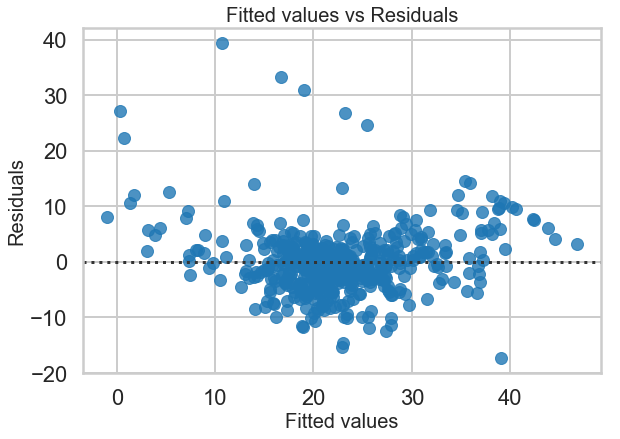

In [60]:
sns.residplot(m_3.fittedvalues, m_3.resid)

plt.title("Fitted values vs Residuals", fontsize=20)
plt.xlabel("Fitted values", fontsize=20)
plt.ylabel("Residuals", fontsize=20)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

On the most part, the residuals seem more or less randomly dispersed around 0, but with the exception of the right diagonal values which are disposed in a line. This is when the original prices are around 50, as seen before.

#### Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

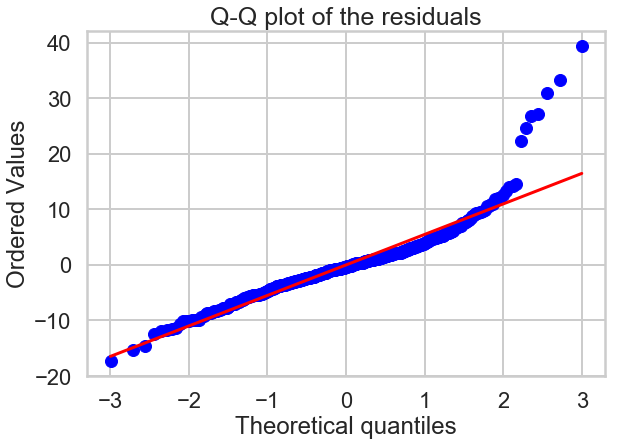

In [61]:
# Q-Q plot
stats.probplot(m_3.resid, dist="norm", plot=plt)

plt.title("Q-Q plot of the residuals", fontsize=25)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

With the Q-Q plot it is visually more clear that the residuals do not follow a normal distribution, hence violating one of the assumptions for the validity of OLS.

#### Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

With the quantile plot it is easier to visually check if the normality assumption was violated or not, by having an idea of the residuals distribution versus the normal distribution. It can also be checked on the residuals vs fitted values plot, but here it was clearer. When plotting the individual residuals we can get a better sense of the variance of the residuals (if they are constant/homoscedastic or not).

#### Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

In [62]:
# points for which the original price is far from the value predicted by the model (outliers)
diff = m_3.predict() - bos['PRICE']
print(diff.describe().apply(lambda x: '%.3f' % x))

# defining outliers function based on z-score function
def outliers_zscore(diff, threshold):
    zscore_diff = (diff - diff.mean())/diff.std()
    return zscore_diff[(zscore_diff > threshold) | (zscore_diff < -threshold)]

# data where the outliers are present
outliers = bos[['PRICE', 'RM', 'CRIM', 'PTRATIO']].iloc[outliers_zscore(diff, 3).index]
outliers

count    506.000
mean       0.000
std        5.858
min      -39.299
25%       -2.187
50%        0.339
75%        3.015
max       17.212
Name: PRICE, dtype: object


,PRICE,RM,CRIM,PTRATIO
365,27.5,3.561,4.55587,20.2
367,23.1,3.863,13.52220,20.2
368,50.0,4.970,4.89822,20.2
369,50.0,6.683,5.66998,20.2
370,50.0,7.016,6.53876,20.2
371,50.0,6.216,9.23230,20.2
372,50.0,5.875,8.26725,20.2


In this 3-variable model the outliers were more clearly showed by the variables 'RM' and 'CRIM', especially when the original price was equal to 50, as previously seen. There are also 2 other data points (price equal to 23.1 and 27.5), when considering outliers based on a z-score with a threshold of 3, as computed above.

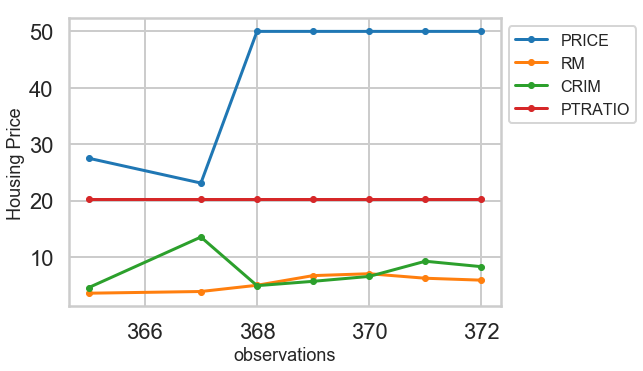

In [63]:
plt.plot(outliers, marker='.')
plt.legend(['PRICE', 'RM', 'CRIM', 'PTRATIO'], bbox_to_anchor=(1, 1), fontsize=16)
plt.ylabel("Housing Price", fontsize=18)
plt.xlabel("observations", fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [64]:
outliers

,PRICE,RM,CRIM,PTRATIO
365,27.5,3.561,4.55587,20.2
367,23.1,3.863,13.52220,20.2
368,50.0,4.970,4.89822,20.2
369,50.0,6.683,5.66998,20.2
370,50.0,7.016,6.53876,20.2
371,50.0,6.216,9.23230,20.2
372,50.0,5.875,8.26725,20.2


In [65]:
# general description of the variables
bos[['PRICE', 'RM', 'CRIM', 'PTRATIO']].describe()

,PRICE,RM,CRIM,PTRATIO
count,506.000000,506.000000,506.000000,506.000000
mean,22.532806,6.284634,3.613524,18.455534
std,9.197104,0.702617,8.601545,2.164946
min,5.000000,3.561000,0.006320,12.600000
25%,17.025000,5.885500,0.082045,17.400000
50%,21.200000,6.208500,0.256510,19.050000
75%,25.000000,6.623500,3.677083,20.200000
max,50.000000,8.780000,88.976200,22.000000


Considering this information, attributing a housing price of 50 where there is a high per capita crime rate seems a bit suspicious. As seen before, the 'RM' values don't seem to be very high given the corresponding price, and the 'PTRATIO' also seems a bit high. So it seems that there are some errors on the price data, given that all the independent variables point to a lower value. 

#### Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

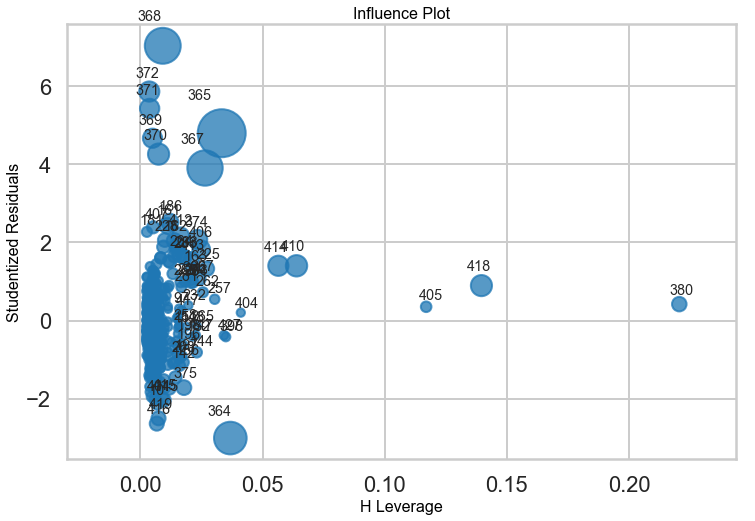

In [66]:
# leverage plot
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(m_3, alpha  = 0.05, ax = ax, criterion="cooks")

In [67]:
# high leverage points
high_leverage = [380, 418, 405, 410, 414]

# expose
bos.iloc[high_leverage]

# m_3.get_influence().summary_frame()['hat_diag'].sort_values(ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


In [68]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We've seen that outliers were observations where the predicted price values were far from the original ones. High leverage points have unusual values for the predictors. In a multiple regression, like in this case, it is harder to identify them since it is possible that a predictor is within the range of its values but when combined with the full set of the predictors it becomes an unusual observation. In this case, it is immediate to see that the all the 'CRIM' values stand out, given that they are extremely high and way out of range of its normal values.

#### Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [69]:
# outliers and high leverage points index
out_lev = list(outliers.index) + high_leverage

# new dataframe
bos_new = bos.drop(out_lev, axis=0)

Old model

In [70]:
# old model
m_3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           6.15e-98
Time:                        20:07:48   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

New model

In [71]:
# new model
m_3_new = ols('PRICE ~ CRIM + RM + PTRATIO', bos_new).fit()
print(m_3_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     426.4
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          3.64e-136
Time:                        20:07:48   Log-Likelihood:                -1456.3
No. Observations:                 494   AIC:                             2921.
Df Residuals:                     490   BIC:                             2937.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8011      3.259     -2.087      0.0

We see rapidly see some metrics that tells us that the new linear regression model fits better the data than before. 
* The adjusted R-squared improved (0.592 to 0.721)
* The F statistic is now 426, rather than 245
* The AIC dropped from 3232 to 2921

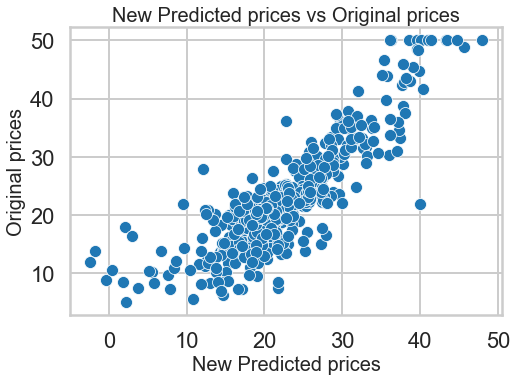

In [72]:
# New Predicted prices vs Original prices
sns.scatterplot(m_3_new.fittedvalues, bos_new['PRICE'])

plt.title("New Predicted prices vs Original prices", fontsize=20)
plt.xlabel("New Predicted prices", fontsize=20)
plt.ylabel("Original prices", fontsize=20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Now it looks better.

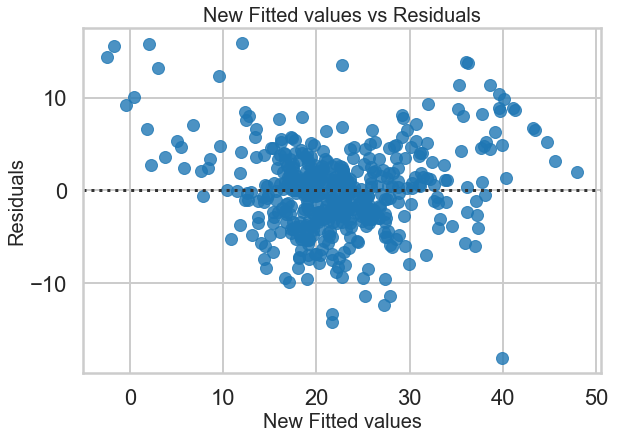

In [73]:
# fitted values vs residuals
sns.residplot(m_3_new.fittedvalues, m_3_new.resid)

plt.title("New Fitted values vs Residuals", fontsize=20)
plt.xlabel("New Fitted values", fontsize=20)
plt.ylabel("Residuals", fontsize=20)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

The residuals now point to less variance.

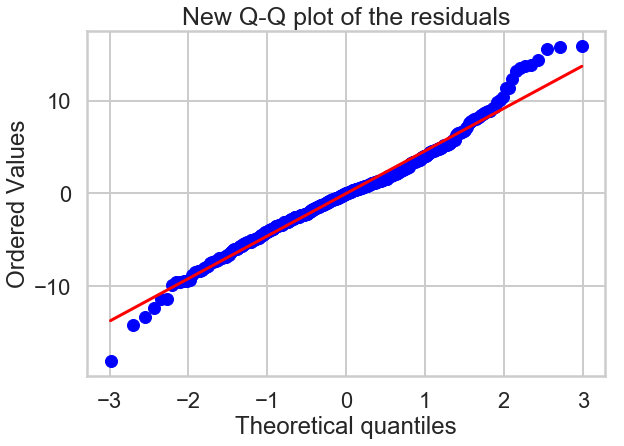

In [74]:
# new Q-Q plot
stats.probplot(m_3_new.resid, dist="norm", plot=plt)

plt.title("New Q-Q plot of the residuals", fontsize=25)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

It now looks more like a normal distribution.

In [75]:
# points for which the original price is far from the value predicted by the model (outliers)
diff_new = m_3_new.predict() - bos_new['PRICE']

# data where the outliers are present
outliers_new = bos_new[['PRICE', 'RM', 'CRIM', 'PTRATIO']].iloc[outliers_zscore(diff_new, 3).index]
outliers_new

,PRICE,RM,CRIM,PTRATIO
186,50.0,7.831,0.05602,17.8
364,21.9,8.780,3.47428,20.2
382,11.3,5.536,9.18702,20.2
417,10.4,5.304,25.94060,20.2
419,8.4,6.824,11.81230,20.2
424,11.7,5.565,8.79212,20.2
428,11.0,6.193,7.36711,20.2


Now it seems more of a deficiency of the model.

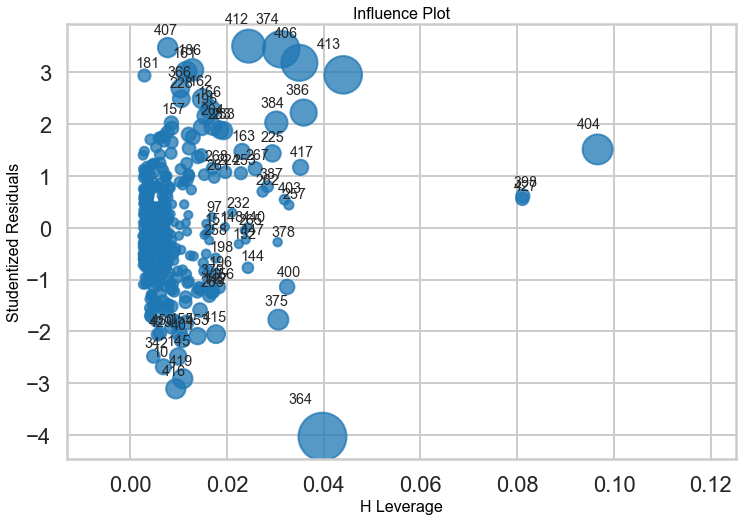

In [76]:
# leverage plot
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(m_3_new, alpha  = 0.05, ax = ax, criterion="cooks")

There is still room for improvement, but not as much as before.

By removing the outliers and the high leverage points, which did not sound unreasonable, the model now fits better the available data. 